In [1]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df_list=[]
for i in df.columns:
    if df[i].dtype=='int64' or df[i].dtype=='float64':
        df_list.append(i)

In [5]:
df_list

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [6]:
new_df=pd.DataFrame()

In [7]:
new_df=df[df_list]

In [8]:
new_df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
new_df.shape

(205, 16)

In [10]:
new_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [12]:
corr=new_df.corr()
corr

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [13]:
corr.price

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [18]:
df['doornumber'].astype('category')

0      2
1      2
2      2
3      4
4      4
      ..
200    4
201    4
202    4
203    4
204    4
Name: doornumber, Length: 205, dtype: category
Categories (2, int64): [2, 4]

In [19]:
df['doornumber']=df['doornumber'].map({'two':2,'four':4})

In [20]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,NaN,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,NaN,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,NaN,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,NaN,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,NaN,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,NaN,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,NaN,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,NaN,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,NaN,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## Normalization

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [48]:
standrd=MinMaxScaler(feature_range=(0,1))

In [49]:
fitteddata=standrd.fit_transform(new_df)

In [50]:
norm_data=pd.DataFrame(fitteddata,columns=new_df.columns)

In [51]:
norm_data.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.000000,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.207959
1,0.004902,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.009804,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.014706,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.019608,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.306142


## Feature Selection

In [62]:
X=norm_data.iloc[:,0:15].to_numpy()
y=norm_data.iloc[:,-1].to_numpy().reshape(-1,1)

In [63]:
X.shape,y.shape

((205, 15), (205, 1))

In [67]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [68]:
featurebest=SelectKBest(score_func=f_classif,k=10)

In [69]:
fitteddata=featurebest.fit(X,y)

In [85]:
dfscores=pd.DataFrame(fitteddata.scores_)
dfcols=pd.DataFrame(norm_data.iloc[:,0:15].columns)

In [86]:
featurescores=pd.concat([dfcols,dfscores],axis=1)

In [87]:
featurescores.columns=['Specs','Score']

In [89]:
featurescores.nlargest(10,'Score')

,Specs,Score
7,enginesize,40.738174
6,curbweight,36.893341
4,carwidth,18.604206
11,horsepower,17.351764
3,carlength,17.047390
13,citympg,10.454953
2,wheelbase,10.272157
14,highwaympg,7.986910
12,peakrpm,5.316675
5,carheight,2.674096


In [103]:
new_data2=pd.DataFrame()
new_data2=norm_data[['enginesize','curbweight','carwidth','horsepower', 'carlength', 'citympg', 'wheelbase', 'highwaympg', 'peakrpm', 'carheight','price']]

In [104]:
new_data2

,enginesize,curbweight,carwidth,horsepower,carlength,citympg,wheelbase,highwaympg,peakrpm,carheight,price
0,0.260377,0.411171,0.316667,0.262500,0.413433,0.222222,0.058309,0.289474,0.346939,0.083333,0.207959
1,0.260377,0.411171,0.316667,0.262500,0.413433,0.222222,0.058309,0.289474,0.346939,0.083333,0.282558
2,0.343396,0.517843,0.433333,0.441667,0.449254,0.166667,0.230321,0.263158,0.346939,0.383333,0.282558
3,0.181132,0.329325,0.491667,0.225000,0.529851,0.305556,0.384840,0.368421,0.551020,0.541667,0.219254
4,0.283019,0.518231,0.508333,0.279167,0.529851,0.138889,0.373178,0.157895,0.551020,0.541667,0.306142
...,...,...,...,...,...,...,...,...,...,...,...
200,0.301887,0.567882,0.716667,0.275000,0.711940,0.277778,0.655977,0.315789,0.510204,0.641667,0.291123
201,0.301887,0.605508,0.708333,0.466667,0.711940,0.166667,0.655977,0.236842,0.469388,0.641667,0.345738
202,0.422642,0.591156,0.716667,0.358333,0.711940,0.138889,0.655977,0.184211,0.551020,0.641667,0.406311
203,0.316981,0.670675,0.716667,0.241667,0.711940,0.361111,0.655977,0.289474,0.265306,0.641667,0.430763


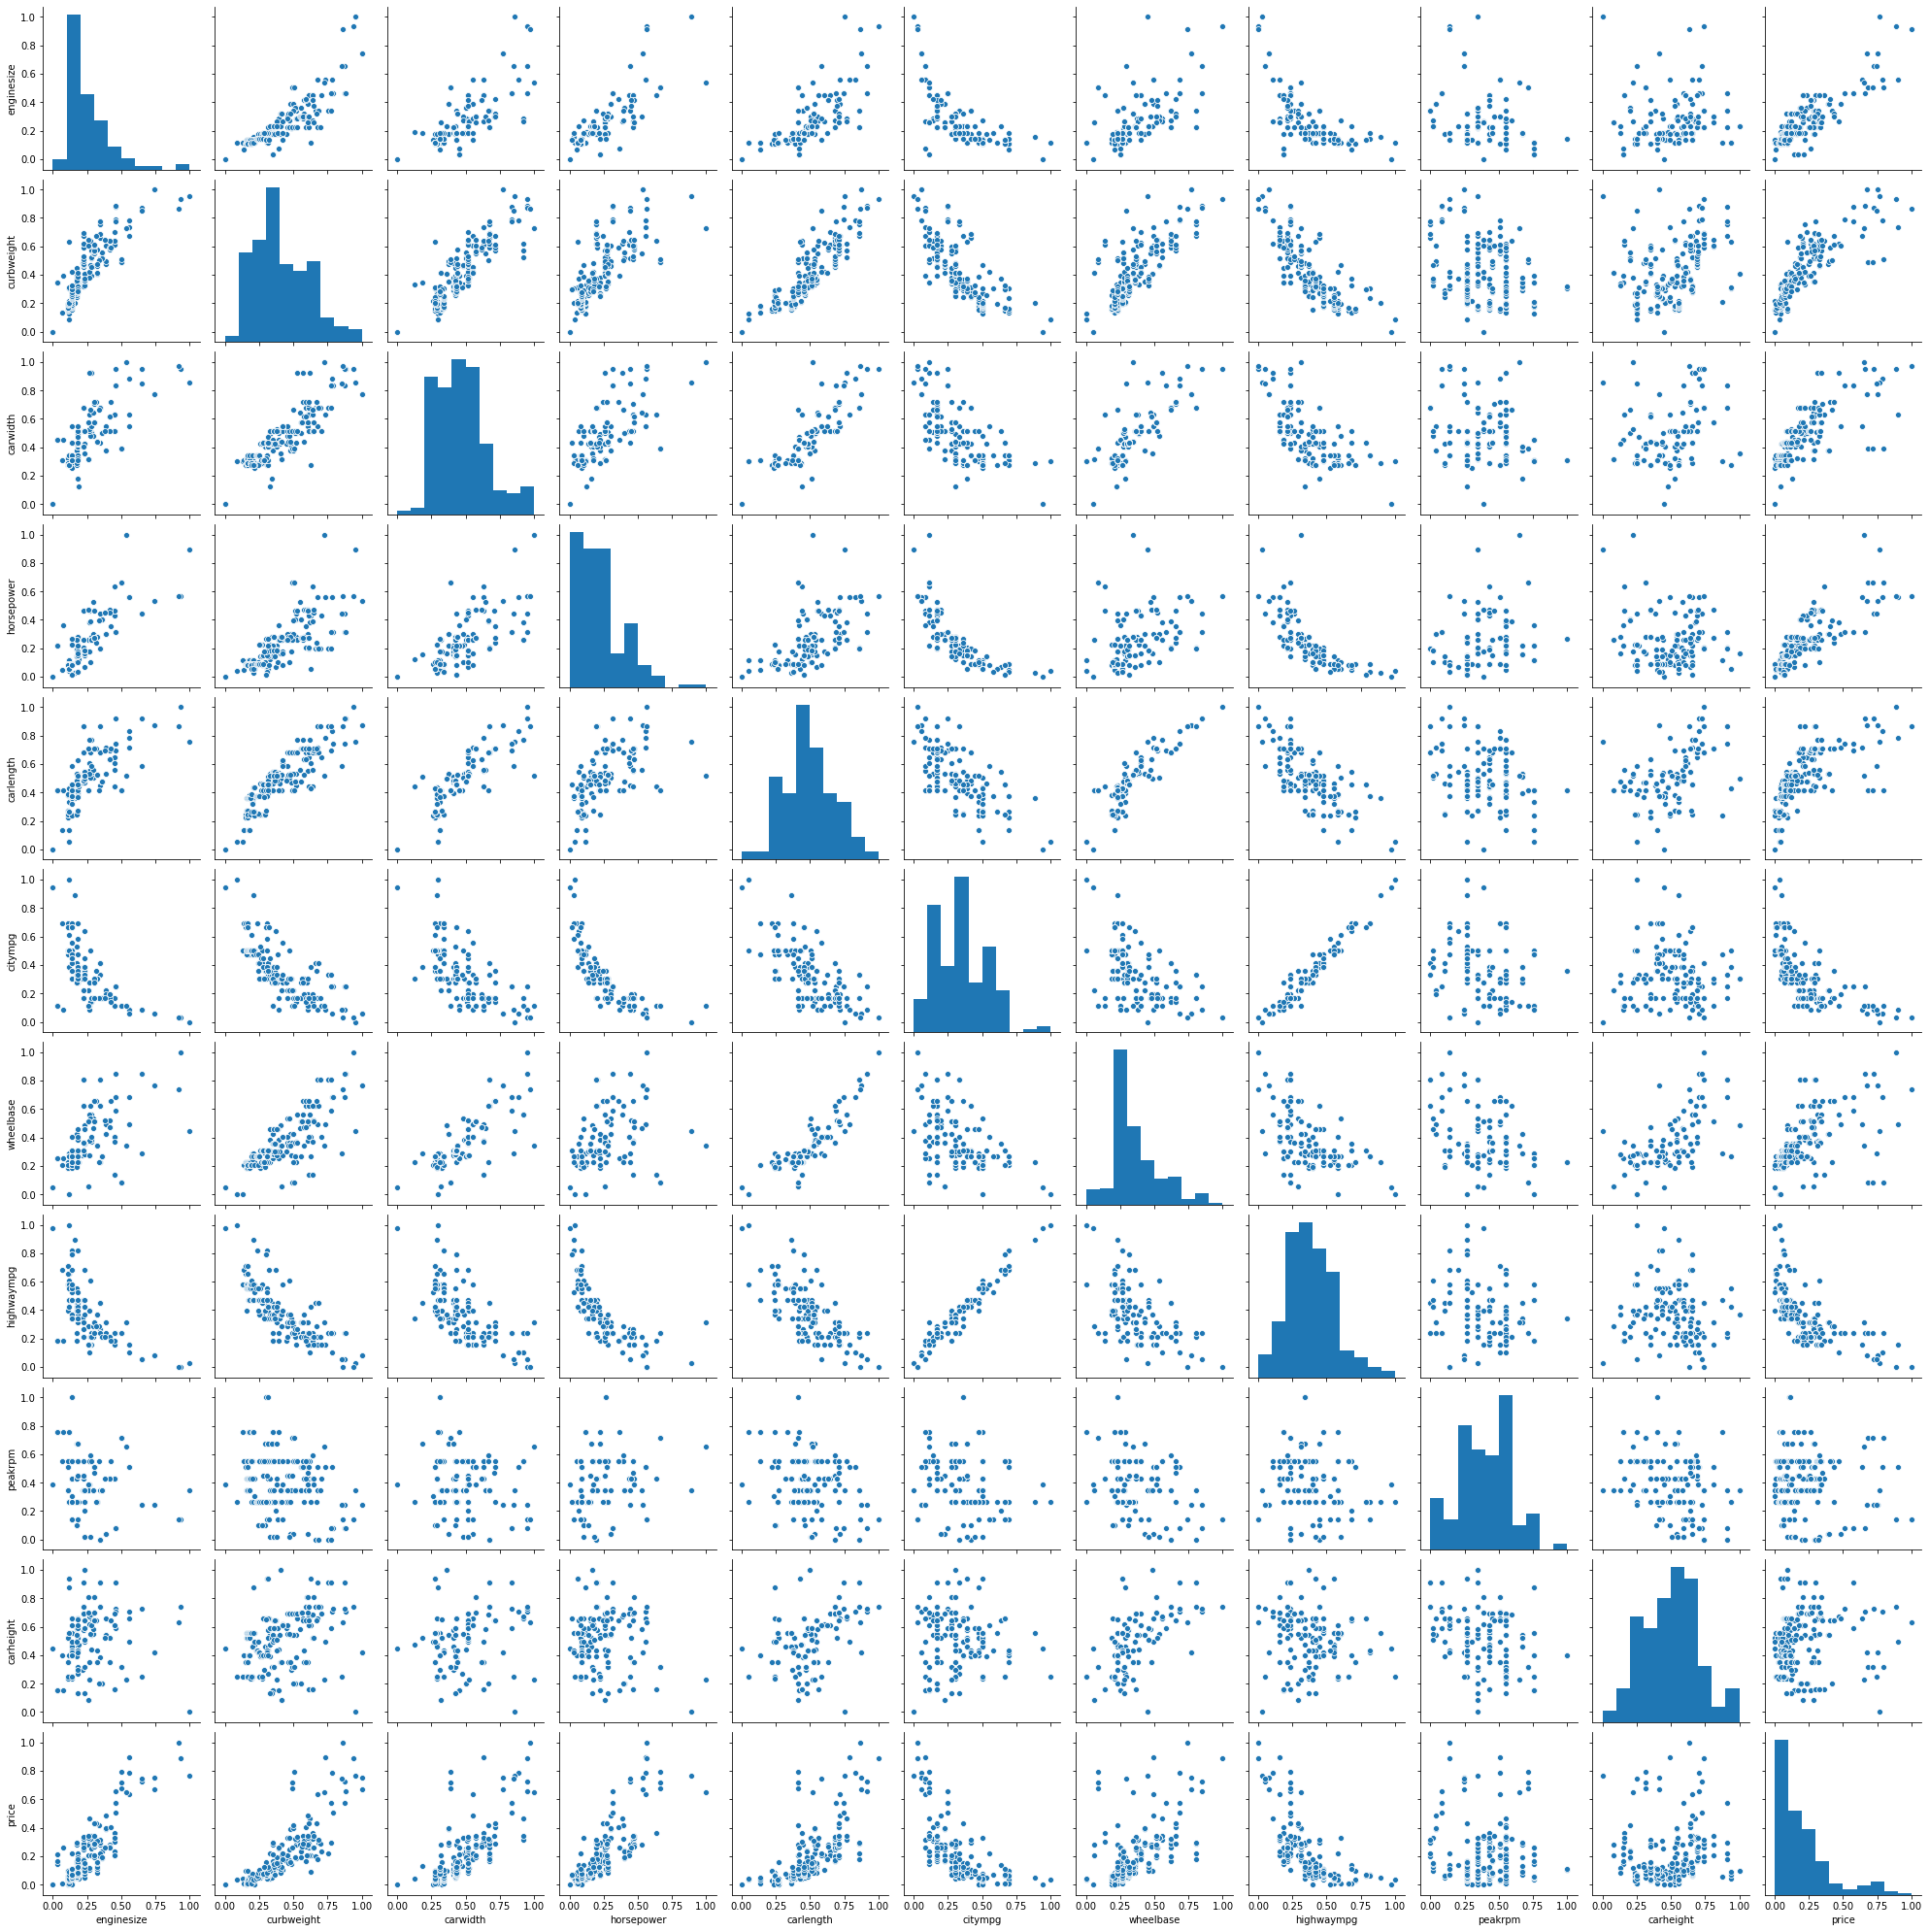

In [105]:
sns.pairplot(new_data2)

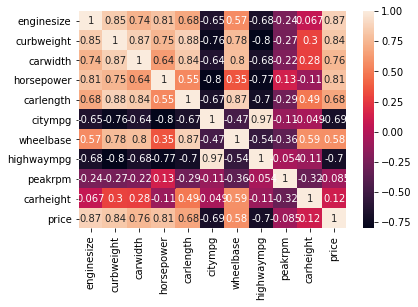

In [106]:
sns.heatmap(new_data2.corr(),annot=True)

## Linear Regression

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [126]:
X_new=new_data2.iloc[:,0:11].to_numpy()
y_new=new_data2.iloc[:,-1].to_numpy().reshape(-1,1)

In [127]:
lreg=LinearRegression()

In [130]:
lreg.fit(X_new,y_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
lreg.score(X_new,y_new)

1.0

## 3D plots

In [132]:
import plotly
import plotly.graph_objs as go

In [133]:
new_data2.columns

Index(['enginesize', 'curbweight', 'carwidth', 'horsepower', 'carlength',
       'citympg', 'wheelbase', 'highwaympg', 'peakrpm', 'carheight', 'price'],
      dtype='object')

## matplotlib library

In [154]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

<IPython.core.display.Javascript object>


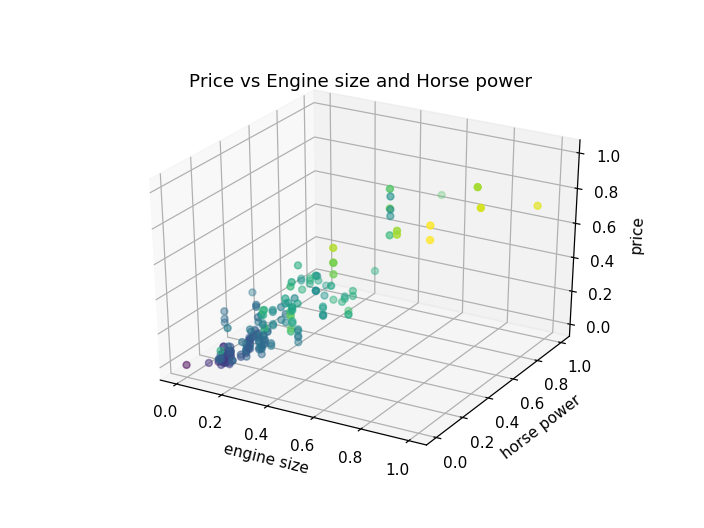

Text(0.5, 0.92, 'Price vs Engine size and Horse power')

In [162]:
fig=plt.figure(1)
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X_new[:,0],X_new[:,3],y_new,c=X_new[:,1])
ax.set_xlabel('engine size')
ax.set_ylabel('horse power')
ax.set_zlabel('price')
ax.set_title('Price vs Engine size and Horse power')

In [168]:
from matplotlib.animation import FuncAnimation

<IPython.core.display.Javascript object>


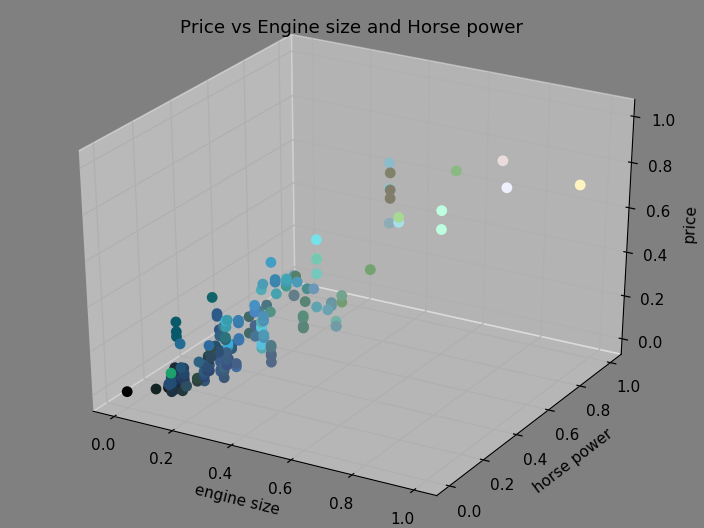

Text(0.5, 0.92, 'Price vs Engine size and Horse power')

In [172]:
bits = 8
fig = plt.figure()
fig.subplots_adjust(left=0, bottom=0, right=1, top=1)
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor((0.5, 0.5, 0.5))
gradient = np.linspace(0, 1, 2**bits)
X,Y,Z = np.meshgrid(gradient, gradient, gradient)

colors=np.stack((X_new[:,0].flatten(),X_new[:,1].flatten(),X_new[:,4].flatten()),axis=1)
ax.scatter(X_new[:,0],X_new[:,3],y_new,alpha=1.0,s=100./2,c=colors,marker='o',linewidth=0)
ax.set_xlabel('engine size')
ax.set_ylabel('horse power')
ax.set_zlabel('price')
ax.set_title('Price vs Engine size and Horse power')

In [170]:
def update(i, fig, ax):
    ax.view_init(elev=20., azim=i)
    return fig, ax
 
anim = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), repeat=True, fargs=(fig, ax))
anim.save('car_price_cube.gif', dpi=80, writer='imagemagick', fps=24)

## Dimensionality Reduction

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [118]:
X_new=new_data2.iloc[:,0:11].to_numpy()
y_new=new_data2.iloc[:,-1].to_numpy().reshape(-1,1)

In [119]:
stand=StandardScaler(X_new)

In [120]:
stand.fit(X_new)

StandardScaler(copy=array([[0.26037736, 0.41117145, 0.31666667, ..., 0.34693878, 0.08333333,
        0.20795889],
       [0.26037736, 0.41117145, 0.31666667, ..., 0.34693878, 0.08333333,
        0.28255797],
       [0.34339623, 0.51784329, 0.43333333, ..., 0.34693878, 0.38333333,
        0.28255797],
       ...,
       [0.42264151, 0.59115593, 0.71666667, ..., 0.55102041, 0.64166667,
        0.40631051],
       [0.31698113, 0.67067494, 0.71666667, ..., 0.26530612, 0.64166667,
        0.43076312],
       [0.30188679, 0.61055081, 0.71666667, ..., 0.51020408, 0.64166667,
        0.43461099]]),
               with_mean=True, with_std=True)

In [ ]:
fitted_df=stand.transform(new_df)

In [82]:
pca=PCA(n_components=2)

In [83]:
pca.fit(fitted_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [84]:
pca_data=pca.transform(fitted_df)

In [85]:
pca_data.shape,fitted_df.shape

((205, 2), (205, 17))

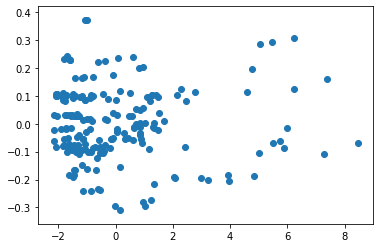

In [91]:
plt.scatter(pca_data[:,0],pca_data[:,1])

In [92]:
from mpl_toolkits.mplot3d import Axes3D

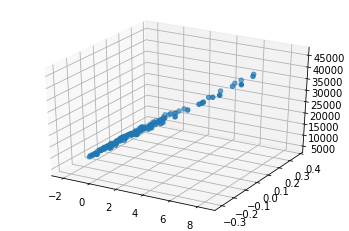

In [93]:
fig=plt.figure(1)
ax=fig.add_subplot(111,projection='3d')
ax.scatter(pca_data[:,0],pca_data[:,1],y)

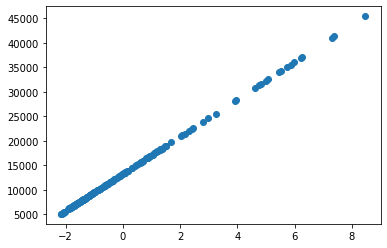

In [94]:
plt.scatter(pca_data[:,0],y)

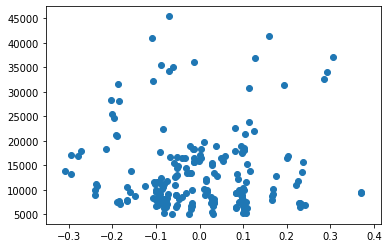

In [95]:
plt.scatter(pca_data[:,1],y)

## Linear Regression for PCA data

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [100]:
regressor=LinearRegression()

In [102]:
regressor.fit(pca_data,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
pred=regressor.predict(pca_data)

In [106]:
ax.scatter(pca_data[:,0],pca_data[:,1],y)

In [107]:
regressor.score(pca_data,y)

0.9999972908016493